In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [8]:
# Simulated dataset
np.random.seed(42)
days = 100
data = {
    'Date': pd.date_range(start='2024-01-01', periods=days, freq='D'),
    'Open_Price': np.random.uniform(100, 150, days),
    'Volume': np.random.randint(1000, 5000, days),
    'Env_Score': np.random.uniform(50, 90, days),
    'Gov_Score': np.random.uniform(60, 95, days),
    'Close_Price': np.random.uniform(100, 150, days)
}
df = pd.DataFrame(data)
df['Close_Price'] = df['Open_Price'] * 0.95 + df['Env_Score'] * 0.03 + df['Gov_Score'] * 0.02 + np.random.normal(0, 2, days)



In [9]:
# Data cleaning
df.loc[5, 'Volume'] = np.nan
df.loc[10, 'Env_Score'] = np.nan
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())
df['Env_Score'] = df['Env_Score'].fillna(df['Env_Score'].mean())



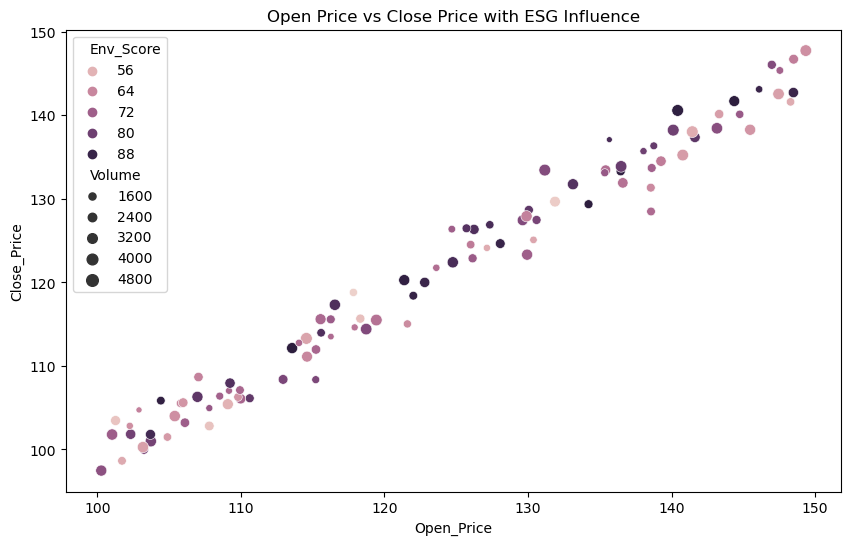

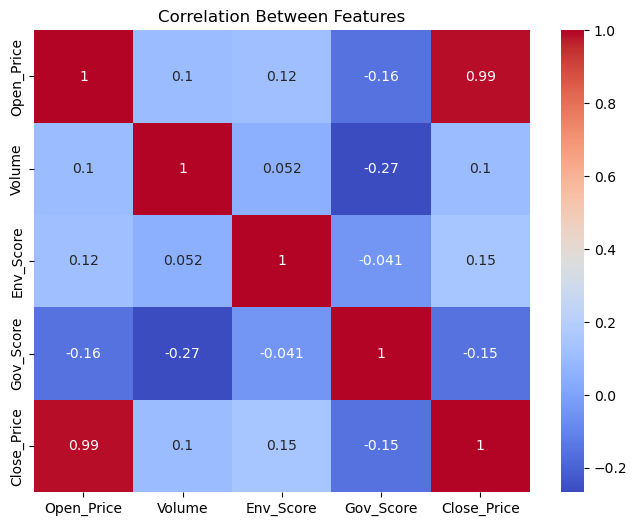

In [4]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open_Price', y='Close_Price', data=df, hue='Env_Score', size='Volume')
plt.title('Open Price vs Close Price with ESG Influence')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('Date', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()


In [5]:
# Prepare data
X = df[['Open_Price', 'Volume', 'Env_Score', 'Gov_Score']]
y = df['Close_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Mean Squared Error: 6.309006750138269
R² Score: 0.9695952172432796


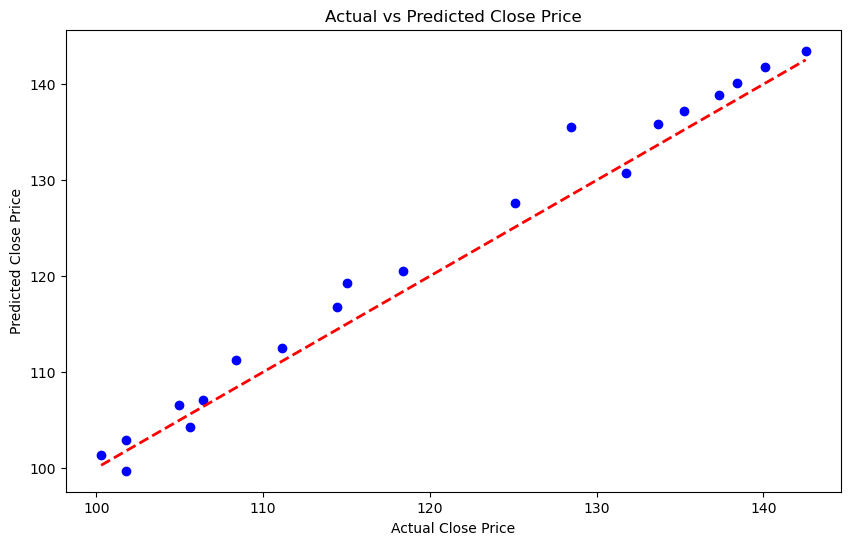

In [6]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.show()

In [7]:
# Create a DataFrame for predicted vs actual values
results_df = X_test.copy()  # Start with the test features
results_df['Actual_Close_Price'] = y_test  # Add actual values
results_df['Predicted_Close_Price'] = y_pred  # Add predicted values

# Reset index to make it cleaner (optional, for display purposes)
results_df = results_df.reset_index(drop=True)

# Round numerical values for readability (optional)
results_df = results_df.round(2)

# Display the first few rows
print("Predicted vs Actual Results:")
print(results_df.head())

# Optionally, save to a CSV file for your portfolio
results_df.to_csv('stock_price_predictions.csv', index=False)
print("Results saved to 'stock_price_predictions.csv'")

Predicted vs Actual Results:
   Open_Price  Volume  Env_Score  Gov_Score  Actual_Close_Price  \
0      103.18  4458.0      59.21      63.30              100.28   
1      144.74  2282.0      73.23      64.65              140.10   
2      138.61  2631.0      71.70      66.40              133.68   
3      133.13  4296.0      83.87      69.50              131.74   
4      112.94  3237.0      78.01      88.98              108.38   

   Predicted_Close_Price  
0                 101.39  
1                 141.78  
2                 135.83  
3                 130.78  
4                 111.29  
Results saved to 'stock_price_predictions.csv'
